In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import losses, optimizers
from keras.layers import Dropout
from keras import regularizers

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing

In [4]:
np.random.seed(7)

In [5]:
data = pd.read_csv("cresciFullPreProcessed.csv")

In [6]:
data.replace([np.inf, -np.inf], np.nan)
data = data.drop(data.columns[[0, 1]], axis=1)
data = data.dropna(axis=0, how='any')
data = data.drop('id', axis=1)
data = data.round(4)
data = data.drop(data[data.friends_to_followers_ratio > np.finfo(np.float64).max].index)

In [7]:
data.shape

(14533, 11)

In [8]:
y = data['is_bot'].values
data = data.drop('is_bot',axis=1)
x = data.values

In [9]:
print("Bots: {bot}\nHuman: {human}".format(bot = len(y[y == 1]), human = len(y[y == 0])))

Bots: 11821
Human: 2712


In [10]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, train_size = 0.67, test_size=0.33, stratify = y, random_state = 7)

In [11]:
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
model = Sequential()

In [13]:
data.columns.shape[0]

10

In [14]:
model.add(Dense(units = 4, input_dim = data.columns.shape[0], activation = 'relu'))

In [15]:
model.add(Dense(units=3, activation='relu'))

In [16]:
model.add(Dense(units = 1, activation='sigmoid'))

In [17]:
model.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 44        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(x_train, y_train, epochs= 100, batch_size=16, verbose=1, validation_split=0.2)

Train on 7789 samples, validate on 1948 samples
Epoch 1/100
7789/7789 [==============================] - 1s 184us/step - loss: 0.6073 - acc: 0.8896 - val_loss: 0.5128 - val_acc: 0.9322
Epoch 2/100
7789/7789 [==============================] - 1s 117us/step - loss: 0.4444 - acc: 0.9466 - val_loss: 0.3866 - val_acc: 0.9497
Epoch 3/100
7789/7789 [==============================] - 1s 120us/step - loss: 0.3416 - acc: 0.9570 - val_loss: 0.3065 - val_acc: 0.9553
Epoch 4/100
7789/7789 [==============================] - 1s 121us/step - loss: 0.2737 - acc: 0.9625 - val_loss: 0.2501 - val_acc: 0.9625
Epoch 5/100
7789/7789 [==============================] - 1s 122us/step - loss: 0.2251 - acc: 0.9675 - val_loss: 0.2083 - val_acc: 0.9625
Epoch 6/100
7789/7789 [==============================] - 1s 118us/step - loss: 0.1908 - acc: 0.9697 - val_loss: 0.1786 - val_acc: 0.9677
Epoch 7/100
7789/7789 [==============================] - 1s 117us/step - loss: 0.1662 - acc: 0.9716 - val_loss: 0.1573 - val_acc: 

7789/7789 [==============================] - 1s 116us/step - loss: 0.0734 - acc: 0.9789 - val_loss: 0.0829 - val_acc: 0.9743
Epoch 61/100
7789/7789 [==============================] - 1s 113us/step - loss: 0.0729 - acc: 0.9788 - val_loss: 0.0838 - val_acc: 0.9748
Epoch 62/100
7789/7789 [==============================] - 1s 121us/step - loss: 0.0725 - acc: 0.9789 - val_loss: 0.0858 - val_acc: 0.9743
Epoch 63/100
7789/7789 [==============================] - 1s 122us/step - loss: 0.0731 - acc: 0.9787 - val_loss: 0.0838 - val_acc: 0.9748
Epoch 64/100
7789/7789 [==============================] - 1s 123us/step - loss: 0.0726 - acc: 0.9777 - val_loss: 0.0850 - val_acc: 0.9748
Epoch 65/100
7789/7789 [==============================] - 1s 126us/step - loss: 0.0721 - acc: 0.9783 - val_loss: 0.0835 - val_acc: 0.9754
Epoch 66/100
7789/7789 [==============================] - 1s 123us/step - loss: 0.0725 - acc: 0.9783 - val_loss: 0.0840 - val_acc: 0.9743
Epoch 67/100
7789/7789 [=======================

In [20]:
epochs = history.epoch

In [21]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

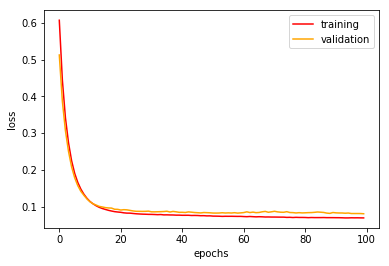

In [22]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='orange', label='validation')
plt.legend(loc='best')

In [23]:
acc = history.history['acc']
validation_acc = history.history['val_acc']

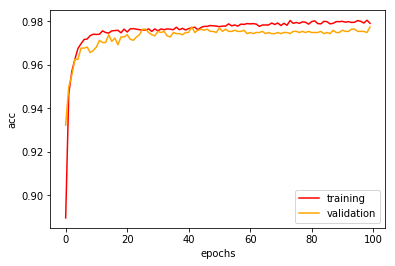

In [24]:
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='orange', label='validation')
plt.legend(loc='best')

In [25]:
# evaluacija mreze
test_loss, test_acc = model.evaluate(x_test, y_test)
print ("Test loss: {}, test accuracy: {}".format(test_loss, test_acc))

4796/4796 [==============================] - 0s 27us/step
Test loss: 0.07825165156824973, test accuracy: 0.9747706423012588


In [26]:
model = Sequential()
model.add(Dense(units = 4, input_dim = data.columns.shape[0], activation = 'relu'))
model.add(Dense(units=3, activation='relu'))
model.add(Dense(units = 1, activation='sigmoid'))
model.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs= 30, batch_size=16, verbose=1, validation_split=0.2)

Train on 7789 samples, validate on 1948 samples
Epoch 1/30
7789/7789 [==============================] - 2s 195us/step - loss: 0.5392 - acc: 0.7780 - val_loss: 0.2745 - val_acc: 0.9138
Epoch 2/30
7789/7789 [==============================] - 1s 121us/step - loss: 0.2021 - acc: 0.9330 - val_loss: 0.1805 - val_acc: 0.9374
Epoch 3/30
7789/7789 [==============================] - 1s 125us/step - loss: 0.1578 - acc: 0.9458 - val_loss: 0.1590 - val_acc: 0.9471
Epoch 4/30
7789/7789 [==============================] - 1s 128us/step - loss: 0.1424 - acc: 0.9504 - val_loss: 0.1466 - val_acc: 0.9517
Epoch 5/30
1024/7789 [==>...........................] - ETA: 1s - loss: 0.1133 - acc: 0.9668

In [44]:
# evaluacija mreze
test_loss, test_acc = model.evaluate(x_test, y_test)
print ("Test loss: {}, test accuracy: {}".format(test_loss, test_acc))

4796/4796 [==============================] - 0s 28us/step
Test loss: 0.08617103425747062, test accuracy: 0.9745621351125938


In [45]:
import pickle
filename = 'NN_model.sav'
pickle.dump(model, open(filename, 'wb'))

TypeError: can't pickle _thread.RLock objects